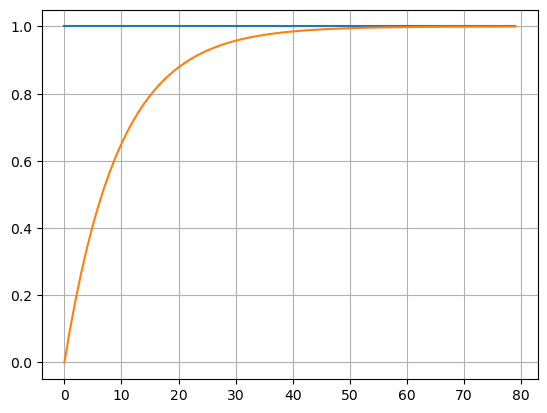

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import os

length = 80
y = np.ones(length)
x = 0
c = [x]
for i in range(length-1):
    x = 0.9 * x + 0.1 * 1
    c.append(x)
    
fig, ax = plt.subplots()
ax.plot(np.arange(length), y)
ax.plot(np.arange(length), c)
plt.grid()
plt.show()

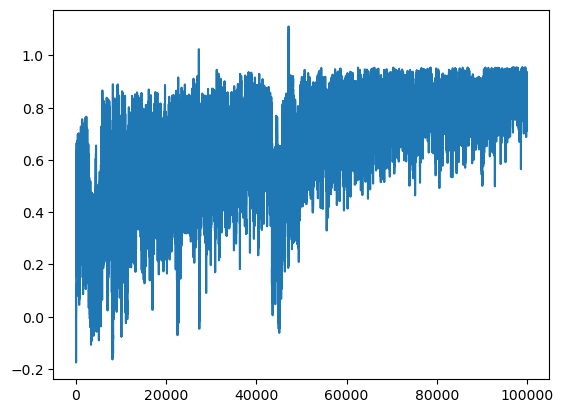

In [17]:
file_path = 'E:/Foraging_RL/DRL/records/small_25.npz'
npzfile = np.load(file_path)
energy = npzfile['energy']

fig, ax = plt.subplots()
ax.plot(energy[:, 2])
plt.show()
    

In [18]:
def smooth(y, radius, mode='two_sided', valid_only=False):
    """
    Smooth signal y, where radius is determines the size of the window

    mode='twosided':
        average over the window [max(index - radius, 0), min(index + radius, len(y)-1)]
    mode='causal':
        average over the window [max(index - radius, 0), index]

    valid_only: put nan in entries where the full-sized window is not available

    """
    assert mode in ('two_sided', 'causal')
    if len(y) < 2*radius+1:
        return np.ones_like(y) * y.mean()
    elif mode == 'two_sided':
        convkernel = np.ones(2 * radius+1)
        out = np.convolve(y, convkernel,mode='same') / np.convolve(np.ones_like(y), convkernel, mode='same')
        if valid_only:
            out[:radius] = out[-radius:] = np.nan
    elif mode == 'causal':
        convkernel = np.ones(radius)
        out = np.convolve(y, convkernel,mode='full') / np.convolve(np.ones_like(y), convkernel, mode='full')
        out = out[:-radius+1]
        if valid_only:
            out[:radius] = np.nan
    return out

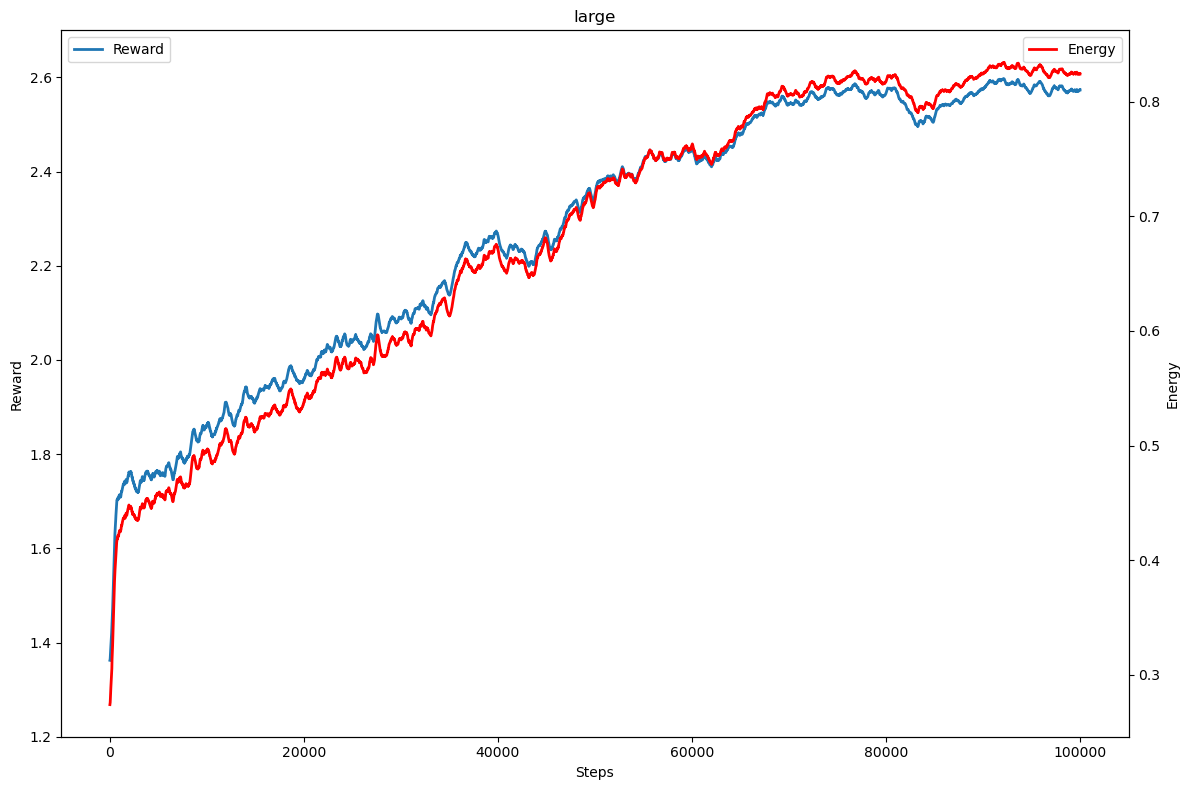

In [71]:
prefix = 'large'
file_list = [prefix + '_' + str(i+1) + '.npz' for i in range(50)]
file_dir = 'E:/Foraging_RL/DRL/records/'

reward_collector = []
energy_collector = []
for file in file_list:
    npzfile = np.load(os.path.join(file_dir, file))
    reward, energy = npzfile['reward'], npzfile['energy'][1:]
    
    mean_trial = reward.mean(axis=1)
    reward_collector.append(mean_trial)
    mean_trial = energy.mean(axis=1)
    energy_collector.append(mean_trial)

mean_reward = np.mean(reward_collector, axis=0)
error_reward = np.std(reward_collector, axis=0) / np.sqrt(50)
mean_reward = smooth(mean_reward, radius=200)
error_reward = smooth(error_reward, radius=200)

mean_energy = np.mean(energy_collector, axis=0)
error_energy = np.std(energy_collector, axis=0) / np.sqrt(50)
mean_energy = smooth(mean_energy, radius=200)
error_energy = smooth(error_energy, radius=200)

fig, ax = plt.subplots(figsize=(12, 8))
ax2 = ax.twinx()
x = np.arange(mean_reward.shape[0])
ax.plot(x, mean_reward, linewidth=2, label='Reward')
#ax.fill_between(x, mean_reward - error_reward, mean_reward + error_reward, alpha=0.5)
ax2.plot(x, mean_energy, color='red', linewidth=2, label='Energy')
#ax2.fill_between(x, mean_energy - error_energy, mean_energy + error_energy, alpha=0.5)

ax.set_xlabel('Steps')
ax.set_ylabel('Reward')
ax2.set_ylabel('Energy')
ax.set_ylim(1.2, 2.7)
ax.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.title(prefix)
plt.tight_layout()
plt.show()